<a href="https://colab.research.google.com/github/rabbeeaa/rabbeeaa/blob/main/Salary_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df= pd.read_csv("/content/archive.zip")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
cdf = df[['YearsExperience','Salary']]
cdf.head(30)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


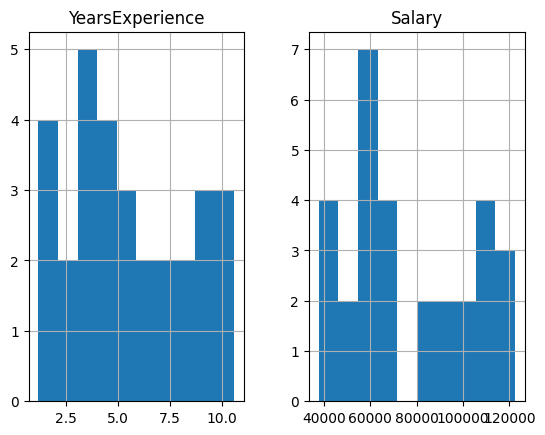

In [5]:
viz = cdf[['YearsExperience','Salary']]
viz.hist()
plt.show()

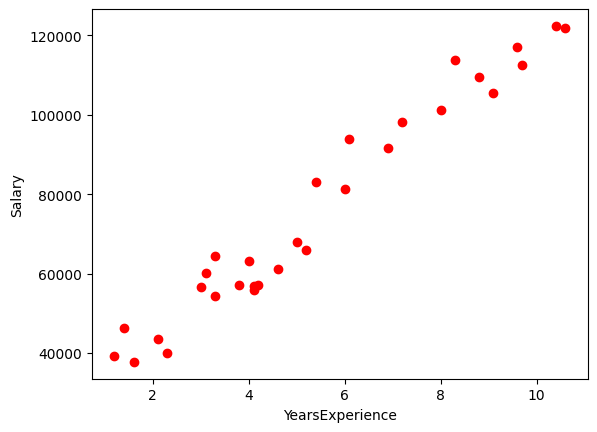

In [6]:
plt.scatter(cdf.YearsExperience, cdf.Salary ,  color='red')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [7]:
#training
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

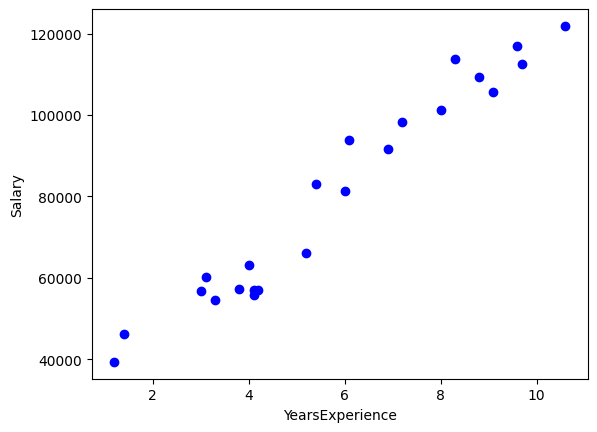

In [8]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [9]:
# modeling
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['YearsExperience']])
train_y = np.asanyarray(train[['Salary']])
regr.fit(train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9301.40621788]]
Intercept:  [26307.12314784]


Text(0, 0.5, 'Salary')

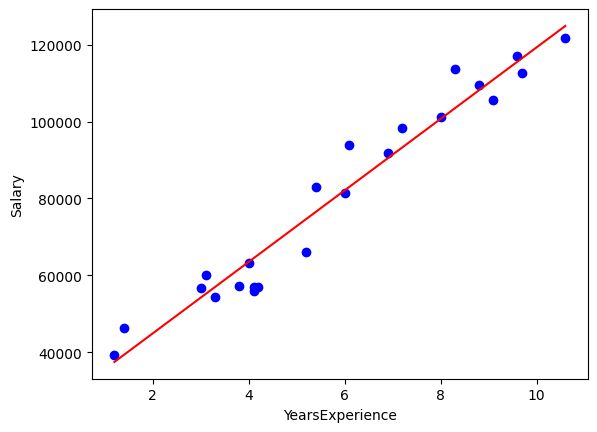

In [10]:
plt.scatter(train.YearsExperience, train.Salary,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

In [11]:
#Evaluation
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['YearsExperience']])
test_y = np.asanyarray(test[['Salary']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 4932.93
Residual sum of squares (MSE): 31655798.00
R2-score: 0.96
